In [9]:
%matplotlib notebook
%matplotlib inline

import trendet
import investpy
import yfinance as yf
import mplfinance as fplt
import mplfinance as mpf

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from datetime import datetime
from subprocess import check_output

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')


from mpl_finance import candlestick_ohlc 
import matplotlib.dates as mpl_dates 
import matplotlib.pyplot as plt

plt.rcParams ['figure.figsize'] = [12, 7] 
plt.rc ('font', size = 11)

In [10]:
# Leitura da da base de dados API
data = yf.download("ADA-USD", start="2019-01-01", end="2021-10-5")
data = data.loc['2021-01-01':'2021-10-5',:]
data.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,0.181382,0.184246,0.172022,0.175350,0.175350,1122218004
2021-01-02,0.175359,0.184253,0.169233,0.177423,0.177423,1408849504


Porcentagem	 Preço ($)
00.0%		 3.0991859436035156
23.6%		 2.409162783920765
38.2%		 1.982284049540758
50.0%		 1.6372724696993828
61.8%		 1.2922608898580075
100.0%		 0.17535899579524994


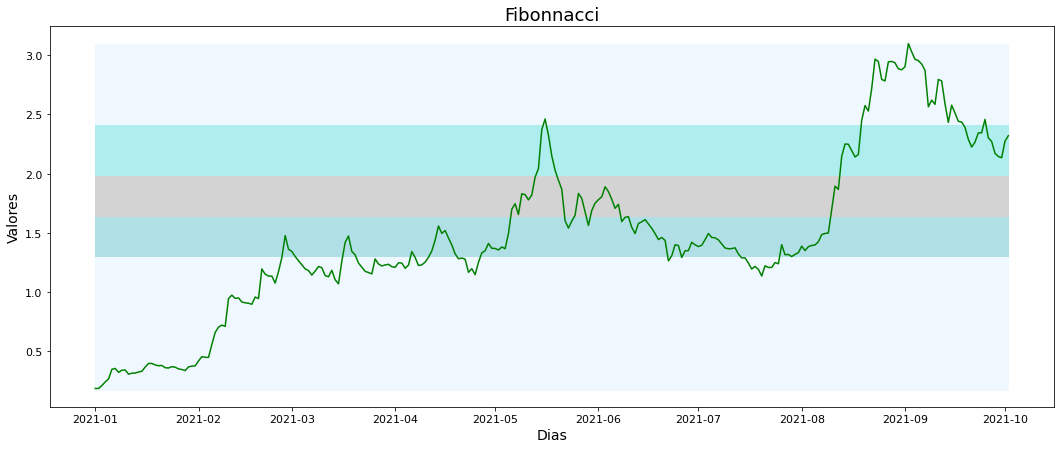

In [13]:
#Calculate the max and min close price
tren = data
maximum_price = tren['High'].max()
minimum_price = tren['Open'].min()
difference = maximum_price - minimum_price #Get the difference        
first_level = maximum_price - difference * 0.236   
second_level = maximum_price - difference * 0.382  
third_level = maximum_price - difference * 0.5     
fourth_level = maximum_price - difference * 0.618  

#Print the price at each level
print("Porcentagem\t", "Preço ($)")
print("00.0%\t\t", maximum_price)
print("23.6%\t\t", first_level)
print("38.2%\t\t", second_level)
print("50.0%\t\t", third_level)
print("61.8%\t\t", fourth_level)
print("100.0%\t\t", minimum_price)

#Create another plot of the Fibonacci levels along with the close price with the levels filled in by color
new_df = tren
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(1,1,1)
plt.title('Fibonnacci',fontsize=18)
plt.plot(new_df.index, new_df['High'], color='g')


ax.fill_between(new_df.index, maximum_price, first_level, color = 'aliceblue')
ax.fill_between(new_df.index, first_level, second_level, color = 'paleturquoise')
ax.fill_between(new_df.index, second_level, third_level, color = 'lightgray')
ax.fill_between(new_df.index, third_level, fourth_level, color = 'powderblue')
ax.fill_between(new_df.index, fourth_level, minimum_price, color = 'aliceblue')

plt.xlabel('Dias',fontsize=14)
plt.ylabel('Valores',fontsize=14)
plt.show()